In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from cluster import cluster
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans as SklearnKMeans

df = pd.read_csv("historical-weather.csv")
df

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,100,2011-09-10 01:40:49,911.8,62.96,95.0,2.3,106.0,2.5,88.0,1.9,0.0,0.0,63.9
2,200,2011-09-10 03:20:49,911.4,68.00,53.0,0.3,69.0,0.5,19.0,0.2,0.0,0.0,33.4
3,300,2011-09-10 05:00:49,911.4,64.22,191.0,2.8,197.0,2.9,185.0,2.6,0.0,0.0,58.2
4,400,2011-09-10 06:40:49,912.2,52.70,181.0,1.5,191.0,2.0,164.0,1.2,0.0,0.0,89.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15868,1586800,2014-09-10 16:23:29,914.3,77.18,225.0,5.2,238.0,6.0,214.0,4.4,0.0,0.0,43.2
15869,1586900,2014-09-10 18:03:29,914.4,77.00,190.0,1.5,196.0,1.7,185.0,1.4,0.0,0.0,42.8
15870,1587000,2014-09-10 19:43:29,914.9,75.92,344.0,0.4,352.0,0.6,336.0,0.3,0.0,0.0,43.9
15871,1587100,2014-09-10 21:23:29,915.7,75.38,13.0,1.5,24.0,1.7,4.0,1.2,0.0,0.0,46.7


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15873 entries, 0 to 15872
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rowID               15873 non-null  int64  
 1   hpwren_timestamp    15873 non-null  object 
 2   air_pressure        15873 non-null  float64
 3   air_temp            15873 non-null  float64
 4   avg_wind_direction  15873 non-null  float64
 5   avg_wind_speed      15873 non-null  float64
 6   max_wind_direction  15873 non-null  float64
 7   max_wind_speed      15873 non-null  float64
 8   min_wind_direction  15873 non-null  float64
 9   min_wind_speed      15873 non-null  float64
 10  rain_accumulation   15873 non-null  float64
 11  rain_duration       15873 non-null  float64
 12  relative_humidity   15873 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 1.6+ MB


In [8]:
df.describe()

,rowID,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
count,1.587300e+04,15873.000000,15873.000000,15873.000000,15873.000000,15873.000000,15873.000000,15873.000000,15873.000000,15873.000000,15873.000000,15873.000000
mean,7.936000e+05,916.829163,61.854689,161.287524,2.792804,162.700945,3.414625,166.644297,2.152268,0.000246,0.381174,47.599313
std,4.582285e+05,3.051722,11.835414,95.304153,2.070311,92.260881,2.428677,97.815591,1.757947,0.005779,4.387898,26.194045
min,0.000000e+00,905.100000,32.360000,0.000000,0.100000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,1.500000
25%,3.968000e+05,914.800000,52.700000,61.000000,1.300000,68.000000,1.600000,75.000000,0.800000,0.000000,0.000000,24.700000
50%,7.936000e+05,916.700000,62.420000,182.000000,2.200000,186.000000,2.800000,180.000000,1.700000,0.000000,0.000000,44.600000
75%,1.190400e+06,918.700000,70.880000,217.000000,3.800000,223.000000,4.600000,212.000000,3.000000,0.000000,0.000000,67.900000
max,1.587200e+06,929.400000,96.440000,359.000000,20.100000,359.000000,20.900000,359.000000,19.500000,0.430000,60.000000,92.900000


In [9]:
# EDA
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

df[numeric_columns]

,rowID,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,0.000246,0.381174,60.5
1,100,911.8,62.96,95.0,2.3,106.0,2.5,88.0,1.9,0.000000,0.000000,63.9
2,200,911.4,68.00,53.0,0.3,69.0,0.5,19.0,0.2,0.000000,0.000000,33.4
3,300,911.4,64.22,191.0,2.8,197.0,2.9,185.0,2.6,0.000000,0.000000,58.2
4,400,912.2,52.70,181.0,1.5,191.0,2.0,164.0,1.2,0.000000,0.000000,89.8
...,...,...,...,...,...,...,...,...,...,...,...,...
15868,1586800,914.3,77.18,225.0,5.2,238.0,6.0,214.0,4.4,0.000000,0.000000,43.2
15869,1586900,914.4,77.00,190.0,1.5,196.0,1.7,185.0,1.4,0.000000,0.000000,42.8
15870,1587000,914.9,75.92,344.0,0.4,352.0,0.6,336.0,0.3,0.000000,0.000000,43.9
15871,1587100,915.7,75.38,13.0,1.5,24.0,1.7,4.0,1.2,0.000000,0.000000,46.7


In [10]:
# feature selection
selected_features = ["air_pressure", "air_temp", "avg_wind_direction", "avg_wind_speed", "relative_humidity"]
X = df[selected_features]

X

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,relative_humidity
0,912.3,64.76,97.0,1.2,60.5
1,911.8,62.96,95.0,2.3,63.9
2,911.4,68.00,53.0,0.3,33.4
3,911.4,64.22,191.0,2.8,58.2
4,912.2,52.70,181.0,1.5,89.8
...,...,...,...,...,...
15868,914.3,77.18,225.0,5.2,43.2
15869,914.4,77.00,190.0,1.5,42.8
15870,914.9,75.92,344.0,0.4,43.9
15871,915.7,75.38,13.0,1.5,46.7


In [11]:
# standardization
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

X_std

array([[-1.48418011,  0.24548381, -0.67457237, -0.76937937,  0.49252009],
       [-1.64802718,  0.09339308, -0.69555848, -0.23804137,  0.62232467],
       [-1.77910484,  0.51924712, -1.13626669, -1.20411047, -0.54209882],
       ...,
       [-0.63217533,  1.18844632,  1.91721164, -1.15580701, -0.14123172],
       [-0.37002001,  1.1428191 , -1.5559888 , -0.62446901, -0.03433382],
       [-0.30448119,  1.17323725,  1.82277417, -0.91428974,  0.00766178]])

In [15]:
# my kmeans
k = 5
my_kmeans = cluster(n_clusters=k)
my_kmeans.fit(X_std)
my_cluster_centers, my_classification = my_kmeans.evaluate(X_std)

# sklearn kmeans
sklearn_kmeans = SklearnKMeans(n_clusters=k)
sklearn_labels = sklearn_kmeans.fit_predict(X_std)

# convert to a np array to avoid error
my_cluster_centers = np.array(my_cluster_centers)

/home/mluba/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


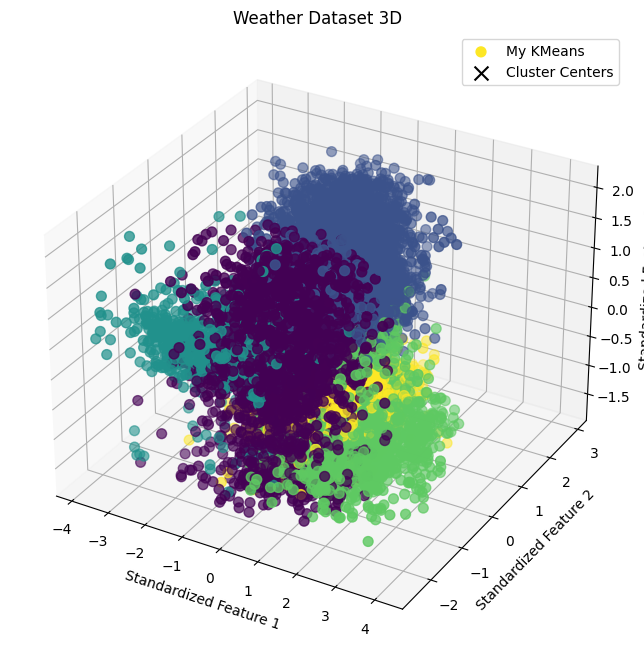

In [16]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# plot
ax.scatter(X_std[:, 0], X_std[:, 1], X_std[:, 2], c=my_classification, cmap="viridis", s=50, label="My KMeans")
ax.scatter(my_cluster_centers[:, 0], my_cluster_centers[:, 1], my_cluster_centers[:, 2], c='black', marker='x', s=100, label="Cluster Centers")
ax.set_xlabel("Standardized Feature 1")
ax.set_ylabel("Standardized Feature 2")
ax.set_zlabel("Standardized Feature 3")
ax.set_title("Weather Dataset 3D")
plt.legend()
plt.show()